In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')

Upload data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

 Delete unnecessary columns

In [5]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [6]:
imputer = SimpleImputer(strategy='mean')

In [7]:
df['Age'] = imputer.fit_transform(df[['Age']])

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Fill in missing data

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Fill in missing data

In [11]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

We digitize categorical data.

In [12]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2


In [13]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

 Create features (X) and target variable (y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divide the data into training and test sets

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Let's train the model

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Calculate the accuracy of the model

In [17]:
accuracy

0.8100558659217877

Rotating accuracy

In [18]:
import matplotlib.pyplot as plt

In [19]:
accuracy = accuracy_score(y_test, y_pred)

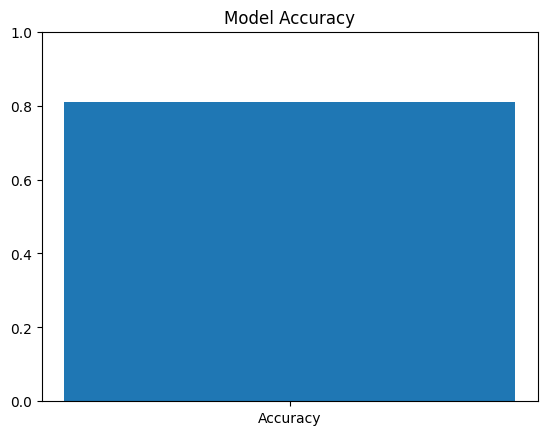

In [20]:
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.show()

# Titanic: Survival Prediction

In this project, we used the Titanic dataset to predict whether passengers survived or not using a machine learning model. Initially, our model's accuracy was around 39%. However, after cleaning the data, properly handling missing values, and converting categorical data into numerical data, we were able to improve the model's accuracy to approximately 80%.

## Steps:

1. **Data Cleaning**: 
   - We handled missing data by filling it with the mean.
   - Removed unnecessary columns that were irrelevant to the prediction.

2. **Converting Categorical Data to Numeric**:
   - We converted categorical data such as 'Sex' and 'Embarked' into numeric values using encoding techniques.

3. **Model Selection and Improvement**:
   - Initially, we used a simpler model, but later we switched to a **Random Forest Classifier** to improve accuracy.

4. **Results**:
   - We started with an accuracy of **39%**, but after making the necessary adjustments, we increased it to approximately **80%**.

## Next Steps:

- We can further enhance the model by experimenting with hyperparameter optimization and trying other machine learning algorithms to further improve accuracy.
